#Zadanie 1a (3 pkt)
Celem zadania jest rozwiązanie problemu plecakowego dwoma metodami - brute force oraz według zadanej heurystyki. Należy zaimplementować metody klasy *KnapSack* - *solve_knapsack_brute_force* oraz *solve_knapsack_pw_ratio*. Poprzez rozwiązanie problemu rozumiemy podanie które przedmioty (indeksy w tablicy) należy spakować do plecaka oraz jaka jest sumaryczna wartość i masa plecaka. Punktacja wygląda następująco:


*   Rozwiązanie problemu metodą brute force. *Podpowiedź: do wygenerowania wszystkich permutacji można użyć funkcji product z biblioteki itertools* - **1.5 pkt**
*   Rozwiązanie problemu według heurystyki - do plecaka pakujemy przedmioty według stosunku wartości do wagi - **1 pkt**
*   Dla metody brute force proszę wygenerować wykres zależności czasu wykonywania metody od liczby elementów w tablicach *weights* i *profits* (do obu tablic należy stopniowo dopisywać po jednym elemencie, np. 10-krotnie, wartości elementów nie mają znaczenia). Proszę również odpowiedzieć na pytania (w osobnej komórce tekstowej) - czy obie metody mają takie same rozwiązania? Jakie są Pani / Pana wnioski? - **0.5 pkt**




In [4]:
import numpy as np
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [5]:
weights = np.array([8, 3, 5, 2])
capacity = 9
profits = np.array([16, 8, 9, 6])

In [11]:
import numpy as np 
import itertools
import matplotlib.pyplot as plt
from time import time


class KnapSack:
  def __init__(self, profits, weights, capacity):
    self.profits = profits
    self.weights = weights
    self.capacity = capacity

  def solve_knapsack_brute_force(self):
    product = itertools.product(range(2), repeat=len(self.weights))
    max_profit = 0
    best_combination = []
    best_weight = 0
    for p in product:
        # np.multiply
        weight = sum(pair[0] * pair[1] for pair in zip(p, self.weights))
        total_profit = sum(pair[0] * pair[1] for pair in zip(p, self.profits))
        if weight < self.capacity and total_profit > max_profit:
            max_profit, best_combination, best_weight = total_profit, p, weight 
    return (max_profit, best_combination, best_weight)
        

  def solve_knapsack_pw_ratio(self):
    ratios = [profit / weight for profit, weight in zip(self.profits, self.weights)]
    ratios = zip(range(len(self.weights)), ratios)
    ratios = sorted(ratios, key= lambda ratio : ratio[1], reverse=True)
    
    max_profit = 0
    best_combination = [0 for _ in range(len(self.weights))]
    best_weight = 0
    for item in ratios:
        id = item[0]
        if (self.weights[id] + best_weight ) < self.capacity:
            best_combination[id] = 1
            best_weight += self.weights[id] 
            max_profit += self.profits[id]
        else:
            return (max_profit, best_combination, best_weight)


knap_sack = KnapSack(profits, weights, capacity)
max_profit, best_combination, best_weight = knap_sack.solve_knapsack_brute_force()
print( 'METODA BRUTE FORCE:')
print( 'max profit:', max_profit)
print( 'best combination:', best_combination)
print( 'best weight:',  best_weight)

max_profit, best_combination, best_weight = knap_sack.solve_knapsack_pw_ratio()
print( 'METODA HEURYSTYCZNA:')
print( 'max profit:' , max_profit)
print( 'best combination:' , best_combination)
print( 'best weight:',  best_weight)




METODA BRUTE FORCE:
max profit: 17
best combination: (0, 1, 1, 0)
best weight: 8
METODA HEURYSTYCZNA:
max profit: 14
best combination: [0, 1, 0, 1]
best weight: 5


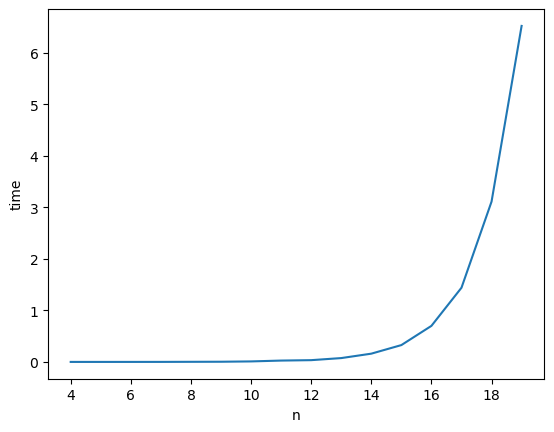

In [10]:
def brute_force_time_plot():
    n_array = []
    times = []
    for n in range(4, 20):
        weights = np.random.randint(low=1, high=100, size=n)
        profits = np.random.randint(low=1, high=100, size=n)
        capacity = 50
        knap_sack = KnapSack(profits, weights, capacity)
        
        start = time()
        knap_sack.solve_knapsack_brute_force()
        end = time()

        times.append(end - start)
        n_array.append(n)
    plt.plot(np.array(n_array), np.array(times))
    plt.xlabel("n")
    plt.ylabel("time")
    plt.show()


brute_force_time_plot()


Rozwiązania nie są identyczne, ponieważ algorytm heurystyczny znajduje pierwsze rozwiązanie dopuszczalne, zgodnie z regułą stodunku wartości do wagi. Algorytm brute force odnajduje wszystkie kombinacje, przez co jest w stanie znaleźć rozwiązanie optymalne ale przez wysoką złożoność obliczeniową nie sprawdza się dla większej liczby elementów. 